<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab4/blob/main/Hall/Lab4_Hall_voltage_slope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab4 Hall voltage slope asymmetry measurements

Evgeny Kolonsky 2025

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Hall Experiment — Summary & Calculations

**Setup & notation**

Magnetic field magnitude: $|B|=0.290\ \mathrm{T}$. Sample thickness: $d=1.0\ \mathrm{mm}=1.0\times10^{-3}\ \mathrm{m}$. Longitudinal resistance at $|B|$: $R_{xx}=42\ \Omega$. From paired $\pm B$ measurements at fixed $|B|$: $m_{\text{odd}}=-1.81\ \mathrm{V/A}$ and $m_{\text{even}}=0.13\ \mathrm{V/A}$.

**Model**

Measured Hall-channel voltage:
$$
U_{\text{meas}}(B,I)=U_H(B,I)+\beta \,U_{xx}(B,I)+U_0,
\tag{1}
$$
with
$$
U_H=H \, I,
$$
$$
U_{xx}=R_{xx}(B)\,I,
$$
and
$$
H=\dfrac{R_H B}{d}.
$$

**Key relations**

$$H\equiv m_{\text{odd}}=\dfrac{R_H B}{d}$$ and
$$\beta=\dfrac{m_{\text{even}}}{R_{xx}(B)}.$$

If fitting separately at $\pm B$:
$$m_{+}=+H+\beta R_{xx}$$ and
$$m_{-}=-H+\beta R_{xx},$$
so the “mirror” mismatch is
$$m_{+}-[-m_{-}]=2\beta R_{xx}=2m_{\text{even}}.$$

**Misalignment factor**

$\beta=\dfrac{0.13}{42}\approx 3.10\times10^{-3}$ (about $0.31\%$ leakage of $U_{xx}$).

**Predicted $\pm B$ slopes**

$m_{+}\approx -1.81+0.13=-1.68\ \mathrm{V/A}$, $m_{-}\approx +1.81+0.13=+1.94\ \mathrm{V/A}$. Mirror comparison: $-m_{-}\approx -1.94$ vs. $m_{+}\approx -1.68$. Relative mismatch: $\dfrac{2,m_{\text{even}}}{|H|}=\dfrac{2\times0.13}{1.81}\approx 0.14$ (about $14%$).

**Hall coefficient.**

$R_H=\dfrac{H,d}{B}=\dfrac{(-1.81),(1.0\times10^{-3})}{0.290}\approx -6.24\times10^{-3}\ \mathrm{m^3/C}$ (negative $\Rightarrow$ n-type).

**Carrier concentration (single-carrier).**

$n=\dfrac{1}{q,|R_H|}=\dfrac{1}{(1.602\times10^{-19})(6.24\times10^{-3})}\approx 1.0\times10^{21}\ \mathrm{m^{-3}}$ (i.e., $1.0\times10^{15}\ \mathrm{cm^{-3}}$).

**Minimal procedure (reproducible).**

1. Fix $|B|=0.290\ \mathrm{T}$.

For each current $I$, measure $U(+B,I)$, $U(-B,I)$, and longitudinal $U_p(I)$.

2. Compute $U_{\text{odd}}(I)=\tfrac{U(+B,I)-U(-B,I)}{2}$ (slope $=H$), $U_{\text{even}}(I)=\tfrac{U(+B,I)+U(-B,I)}{2}$ (slope $=m_{\text{even}}=\beta R_{xx}$), and $R_{xx}(B)=\dfrac{dU_p}{dI}$.

3. Report $R_H=\dfrac{H d}{B}$, $n=\dfrac{1}{q|R_H|}$, and $\beta=\dfrac{m_{\text{even}}}{R_{xx}}$. Verify $m_{+}\approx +H+\beta R_{xx}$ and $m_{-}\approx -H+\beta R_{xx}$.

**Quick numbers**

$H=-1.81\ \mathrm{V/A}$; $m_{\text{even}}=0.13\ \mathrm{V/A}$; $\beta=3.10\times10^{-3}$; $R_H\approx -6.24\times10^{-3}\ \mathrm{m^3/C}$; $n\approx 1.0\times10^{21}\ \mathrm{m^{-3}}$ ($\approx 1.0\times10^{15}\ \mathrm{cm^{-3}}$); predicted $\pm B$

slope mismatch $\approx 14\%$ (from $2 m_{\text{even}}/|H|$).


# 1. Does $U_H$ compensation influence the $U_H(I_p)$ slope?

Text(0, 0.5, 'Uh [mV]')

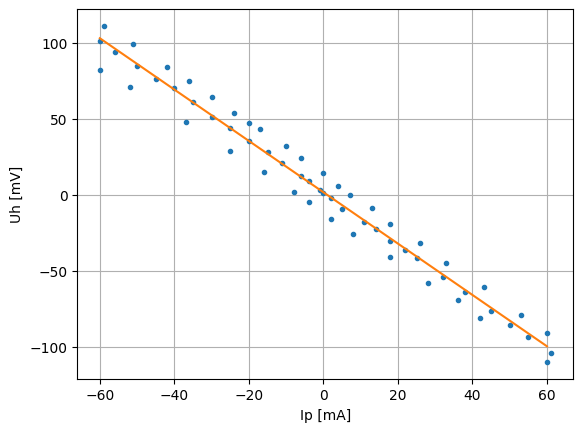

In [3]:
# B = 288  mT
# sample 14
data1 = '''
# Ip/mA, Uh/mV, sign B
# Uh compensation  = 0
-60 100.77
-56 94.00
-50 84.96
-45 76.25
-40 69.95
-35 60.99
-30 51.31
-25 43.8
-20 35.22
-15 27.99
-11 20.95
-6 11.96
-4 9.15
-1 3.34
0 1.00
2 -2.39
5 -9.36
11 -18.23
14 -22.86
18 -30.37
22 -36.42
25 -41.95
32 -54.22
38 -63.84
45 -76.29
50 -85.53
55 -93.79
61 -104.40
#Uh compensation leftmost
-59 111
-51 99
-42 84
-36 75
-30 64
-24 54
-20 47
-17 43
-10 32
-6 24
-0 14
4 6
7 0
13 -9
18 -19
26 -32
33 -45
43 -61
53 -79
60 -91
# Uh comp rightmost
-60 82
-52 71
-37 48
-25 29
-16 15
-8 2
-4 -5
2 -16
8 -26
18 -41
28 -58
36 -69
42 -81
60 -110
'''
Ip1, Uh1 = np.genfromtxt(data1.splitlines()).T

ip = np.linspace(-60, 60)

plt.plot(Ip1, Uh1, '.')
fit1 = linregress(Ip1, Uh1)
plt.plot(ip, ip* fit1.slope + fit1.intercept)
plt.grid()
plt.xlabel('Ip [mA]')
plt.ylabel('Uh [mV]')

Text(0, 0.5, 'Uh [mV]')

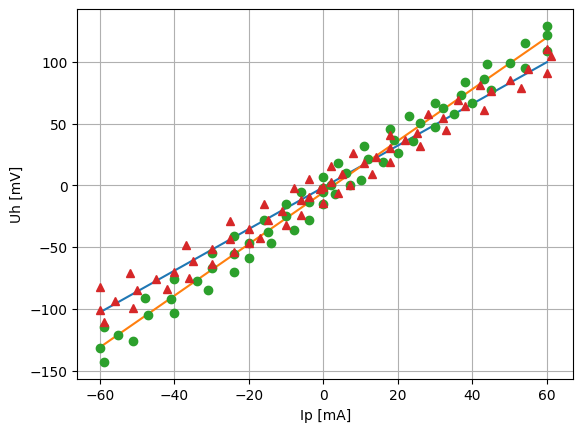

In [4]:
# change B polarity
# B = 287 mT
data2 = '''
# Ip/mA, Uh/mV, sign B
# Uh = 0
-60 -131.53
-55 -120.81
-47 -104.70
-41 -92.11
-34 -77.17
-30 -67.30
-24 -55.90
-20 -46.69
-15 -37.62
-10 -25.23
-4 -13.60
-0 -5.82
0 -2.25
2 0.12
6 10.23
12 21.19
19 36.40
26 50.59
32 62.81
37 73.35
43 85.72
50 99.07
60 121.29
# Uh compensation leftmost
-59 -115
-48 -91
-40 -76
-30 -55
-24 -41
-16 -28
-10 -15
-6 -5.5
0 7
4 18
11 32
18 45.73
23 56
30 67
38 84
44 98
54 115
60 129
# Uh compensation rightmost
60 109
54 95
45 77
40 66.3
35 58
30 47
24 36
20 26
16 19
10 04
7 0
3 -7
0 -15
-4 -28
-8 -36
-14 -47
-20 -59
-24 -70
-31 -85
-40 -103
-51 -126
-59 -143
'''
Ip2, Uh2 = np.genfromtxt(data2.splitlines()).T

fit2 = linregress(Ip2, Uh2)
plt.plot(ip, -ip* fit1.slope - fit1.intercept)
plt.plot(ip, ip* fit2.slope + fit2.intercept)

plt.plot(Ip2, Uh2, 'o')
plt.plot(Ip1, -Uh1, '^')
plt.grid()
plt.xlabel('Ip [mA]')
plt.ylabel('Uh [mV]')

**Conclusion**

No, `Uh compensation` only offsets the line and does not correct the slopes. But slopes are antysymmetric. The suggested reason is $\beta R_{xx}$ component.

# 2. Measure Hall volatge $U_H$ and longitudal voltage $U_{xx}$ as a function of $I_p$

In [6]:
# B = -285 mT
# Uh = 0
data3 = '''
# Ip/mA, Uh/mV, Uxx/mV
-60 101 2595
-50 86 2186
-41 70 1790
-30 52 1315
-20 35 877
-10 18.53 464
0 4 100
2 -0.57 -010
11 -17 -426
20 -31.65 -774
30 -48 -1178
40 -67 -1638
49 -82.5 -2024
62 -103.73 -2545
'''
Ip3, Uh3, Up3 = np.genfromtxt(data3.splitlines()).T

fit3 = linregress(Ip3, Uh3)
Uh3_ = fit3.intercept + ip * fit3.slope
Rx = np.abs(linregress(Ip3, Up3).slope)
print(Rx)
# change B polarity
#B = 277
data4 = '''
# Ip/mA, Uh/mV, Uxx/mV
-60 -120 2590
-49 -100 2169
-40 -81 1767
-29 -60 1302
-19 -42 881
-10 -24 506
0 -4 71
10 -18 -382
20 36 -764
30 57 -1220
40 76 -1626
50 97 -2075
61 114 -2537
'''
Ip4, Uh4, Up4 = np.genfromtxt(data4.splitlines()).T

fit4 = linregress(Ip4, Uh4)
Uh4_ = fit4.intercept + ip * fit4.slope
Rx = np.abs(linregress(Ip4, Up4).slope)
print(Rx)


42.17744139679836
42.563850829385906


In [7]:
Uh_odd = (Uh3_ - Uh4_) / 2
Uh_even = (Uh3_ + Uh4_) / 2
beta = linregress(ip, Uh_even).slope / Rx
beta

np.float64(0.003041099814753615)